# Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from flask import Flask, request, jsonify
import pickle
import requests
import json

# Reading Excel File

In [2]:
ds = pd.read_excel('FinalMlModelTable.xlsx') # Reading Excel File

# Performing EDA

In [3]:
ds.isnull().sum()

Cuisines         1336
Price_for_one       0
Address             0
Ratings             0
Reviews             0
AVG_of_prices       0
dtype: int64

In [4]:
ds.dropna(inplace = True) # Removing NUll Values

In [5]:
ds = ds[~ds['Cuisines'].isin([' '])]

In [6]:
ds

,Cuisines,Price_for_one,Address,Ratings,Reviews,AVG_of_prices
0,Pizza,200,Shanti Nagar,3.8,4426,187.71
1,Burger,200,Brigade Road,3.7,386,450.24
2,Burger,200,Commercial Street,3.9,10400,159.85
3,Biryani,200,Residency Road,4.4,23000,279.70
4,Mithai,200,Brigade Road,4.4,2621,153.29
...,...,...,...,...,...,...
2710,Desserts,150,BTM,3.5,9327,123.55
2717,Sichuan,100,BTM,3.7,472,152.75
2721,Sandwich,100,Vasanth Nagar,3.5,530,181.01
2730,Beverages,200,Seshadripuram,4.1,182,57.35


# Encoding The Categorical Columns

In [7]:
from sklearn.preprocessing import LabelEncoder,StandardScaler # Importing Preprocessing Libraries
lr = LabelEncoder() # Initializing LabelEncoder
sc = StandardScaler() # Initializing StandardScaler

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1415 entries, 0 to 2746
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cuisines       1415 non-null   object 
 1   Price_for_one  1415 non-null   int64  
 2   Address        1415 non-null   object 
 3   Ratings        1415 non-null   float64
 4   Reviews        1415 non-null   int64  
 5   AVG_of_prices  1415 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 77.4+ KB


In [9]:
ds['Cuisines'] = ds['Cuisines'].astype(str).str.strip()

# Creating Dictionaries For Categorical Columns

In [10]:
ds['Cuisines']  = lr.fit_transform(ds['Cuisines']) # Encoding Cuisines Columns With Numerical Values
cuisinedict = dict(zip(lr.classes_, range(len(lr.classes_)))) # Storing Encoded Values in a Dictionary
ds['Address']  = lr.fit_transform(ds['Address']) # Encoding Address Columns With Numerical Values
Addressdict = dict(zip(lr.classes_, range(len(lr.classes_)))) # Storing It in a Dictionary

In [11]:
cuisinedict

{'Afghan': 0,
 'American': 1,
 'Andhra': 2,
 'Arabian': 3,
 'Asian': 4,
 'BBQ': 5,
 'Bakery': 6,
 'Bar Food': 7,
 'Beverages': 8,
 'Biryani': 9,
 'Burger': 10,
 'Burmese': 11,
 'Cafe': 12,
 'Chettinad': 13,
 'Chinese': 14,
 'Coffee': 15,
 'Continental': 16,
 'Desserts': 17,
 'European': 18,
 'Fast Food': 19,
 'Finger Food': 20,
 'Healthy Food': 21,
 'Hyderabadi': 22,
 'Ice Cream': 23,
 'Indonesian': 24,
 'Iranian': 25,
 'Italian': 26,
 'Japanese': 27,
 'Juices': 28,
 'Kashmiri': 29,
 'Kebab': 30,
 'Kerala': 31,
 'Korean': 32,
 'Lebanese': 33,
 'Lucknowi': 34,
 'Maharashtrian': 35,
 'Malaysian': 36,
 'Mangalorean': 37,
 'Mexican': 38,
 'Middle Eastern': 39,
 'Mithai': 40,
 'Modern Indian': 41,
 'Momos': 42,
 'Mughlai': 43,
 'North Indian': 44,
 'Odia': 45,
 'Oriental': 46,
 'Paan': 47,
 'Pancake': 48,
 'Pasta': 49,
 'Pizza': 50,
 'Rajasthani': 51,
 'Rolls': 52,
 'Salad': 53,
 'Sandwich': 54,
 'Seafood': 55,
 'Shake': 56,
 'Shawarma': 57,
 'Sichuan': 58,
 'South Indian': 59,
 'Street Foo

In [12]:
Addressdict 

{'1 Sobha': 0,
 'BTM': 1,
 'Banashankari': 2,
 'Banaswadi': 3,
 'Bannerghatta Road': 4,
 'Basavanagudi': 5,
 'Basaveshwara Nagar': 6,
 'Brigade Road': 7,
 'Church Street': 8,
 'City Market': 9,
 'Commercial Street': 10,
 'Cunningham Road': 11,
 'Domlur': 12,
 'Ejipura': 13,
 'Frazer Town': 14,
 'HBR Layout': 15,
 'Hosur Road': 16,
 'Indiranagar': 17,
 'Infantry Road': 18,
 'JP Nagar': 19,
 'Jayanagar': 20,
 'Jeevan Bhima Nagar': 21,
 'Kammanahalli': 22,
 'Koramangala': 23,
 'Kumaraswamy Layout': 24,
 'Langford Town': 25,
 'Lavelle Road': 26,
 'MG Road': 27,
 'Magrath Road': 28,
 'Majestic': 29,
 'Malleshwaram': 30,
 'Nagawara': 31,
 'New BEL Road': 32,
 'Old Airport Road': 33,
 'Old Madras Road': 34,
 'RT Nagar': 35,
 'Rajajinagar': 36,
 'Residency Road': 37,
 'Richmond Road': 38,
 'Sadashiv Nagar': 39,
 'Sanjay Nagar': 40,
 'Seshadripuram': 41,
 'Shanti Nagar': 42,
 'Shivajinagar': 43,
 'St. Marks Road': 44,
 'Thippasandra': 45,
 'UB City': 46,
 'Ulsoor': 47,
 'Vasanth Nagar': 48,
 'V

In [13]:
ds.drop(['Ratings','Reviews'],axis = 1,inplace = True) # Dropping Unwanted Columns

In [14]:
for i in ds.columns:
    print(ds[i].unique())

[50 10  9 40 19 59 43 23  6 42 21 52 38 60 31 14 61  8 65  2 44 17 54 66
 12  3 56  0 57 37  4 49 13 26 33 39 35 30 45 55 64  1 47 48 27 22 62 63
  5 51 28 15 58 25 16  7 53 34 24 46 18 20 36 29 32 41 11]
[200 100 250 150 300 350 600  50 450]
[42  7 10 37 43 30  5 17 36 23  8 47 46 49 28 11 14  1 48 29 38 50 44 12
  6 41 35 20 34 19 26 45 25 21  3  4 24 15 31  2 13 39 51  9 32 18 22 33
 16  0 40 27]
[187.71 450.24 159.85 279.7  153.29  82.89 188.   194.92 190.95 141.7
 189.7  281.05 165.25 261.15 413.8  280.08 276.55 238.31 230.35 279.5
 230.94 234.4  133.45 198.2  249.5  318.55 204.66 240.05 333.1  111.55
 394.5  128.63  79.75  47.58 258.4   68.78 232.15 158.1   87.17 181.75
 233.8  112.6  122.19 191.61 653.61 282.   150.45 270.6  110.5  266.
 218.27 201.   346.   293.7  307.28 220.5  263.   139.13 245.35  76.5
 134.15 749.37 251.7  222.38 126.65 208.95 179.8  126.5  234.    99.
 281.75 189.5  105.42 216.8  529.4  395.3  216.2  340.   135.5  266.75
 207.   146.05 172.15 166.   272.15 

# Splitting The Labeled Dataset into Input and Output

In [15]:
x = ds.drop('Price_for_one', axis = 1).values
y = ds['Price_for_one'].values

In [16]:
from sklearn.model_selection import train_test_split # Importing train_test_split to split dataset in training and testing Data

# Splitting into Train Test Data

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.1,random_state = 42)

In [18]:
xtrain

array([[  8.  ,   5.  , 189.7 ],
       [  9.  ,  47.  , 394.5 ],
       [ 17.  ,  37.  , 245.95],
       ...,
       [  8.  ,  22.  , 342.5 ],
       [  9.  ,   8.  , 337.  ],
       [ 30.  ,  23.  , 223.4 ]])

In [19]:
ytrain

array([100, 100, 100, ..., 100, 300, 100], dtype=int64)

In [20]:
ytest

array([ 50, 250, 200, 300, 200, 350, 200, 150, 350, 200, 100, 150, 350,
       100, 100, 150, 300, 250, 200, 200, 100, 300, 150, 100, 200, 300,
       100, 350, 100, 200, 100, 100, 200, 250, 100, 200, 250, 350, 250,
       100, 100, 300, 100, 250, 350, 300, 200, 100, 200, 250,  50, 200,
       350, 100, 100, 250, 350, 200, 300, 100, 250, 100, 100, 200, 250,
       100, 100, 150, 300, 200, 150, 100, 200, 100, 100, 100, 250, 350,
       100, 200, 250, 200, 300, 100, 100, 150, 100, 100, 150, 100, 200,
       100, 250, 250, 100, 100, 200, 200, 150, 150, 150, 300, 300, 250,
       250, 300, 100, 100, 100, 250, 100, 350, 200, 200, 300, 200, 200,
       350, 100, 100, 200, 200, 100, 150, 300, 100, 300, 100,  50, 300,
       250, 600, 250, 200, 300, 150,  50, 100, 100, 250, 200, 200],
      dtype=int64)

In [21]:
import seaborn as sns

<Axes: >

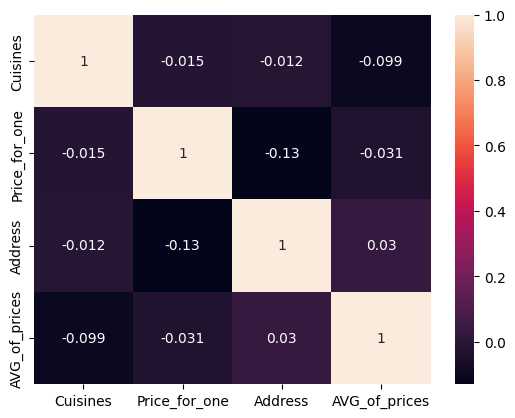

In [22]:
sns.heatmap(ds.corr(), annot = True)

# Decision Tree Model To Predict Price Of Cuisines

In [23]:
from sklearn.tree import DecisionTreeClassifier # Importing Decisioin Tree Model

In [24]:
dc = DecisionTreeClassifier() # Initializing Decision Tree Classifier

In [25]:
dc.fit(xtrain,ytrain) # Fitting the Training model

DecisionTreeClassifier()

In [26]:
ypred3 = dc.predict(xtest) # Prediciting the Testing Data

In [27]:
from sklearn.metrics import accuracy_score,precision_score,recall_score # Importing Evaluation Metrics

In [28]:
accuracy_score(ytest,ypred3) # Evaluating Accuracy of Testing and Predicting data

0.9014084507042254

In [29]:
precision_score(ytest,ypred3,pos_label='positive',average='micro')

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1618: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.9014084507042254

# Dumping The Dc Model in Pickle File

In [30]:
pickle.dump(dc, open('MLProject.pkl','wb')) # Dumping The Model in  pickle file

In [31]:
load_model =  pickle.load(open('MLProject.pkl', 'rb')) # Loading the pickle File and Predicting the value

In [32]:
print(load_model.predict([[8.0000e+00, 5.0000e+00, 1.8970e+02]]))

[100]


In [33]:
xtrain

array([[  8.  ,   5.  , 189.7 ],
       [  9.  ,  47.  , 394.5 ],
       [ 17.  ,  37.  , 245.95],
       ...,
       [  8.  ,  22.  , 342.5 ],
       [  9.  ,   8.  , 337.  ],
       [ 30.  ,  23.  , 223.4 ]])

In [34]:
ytrain

array([100, 100, 100, ..., 100, 300, 100], dtype=int64)

In [35]:
ds

,Cuisines,Price_for_one,Address,AVG_of_prices
0,50,200,42,187.71
1,10,200,7,450.24
2,10,200,10,159.85
3,9,200,37,279.70
4,40,200,7,153.29
...,...,...,...,...
2710,17,150,1,123.55
2717,58,100,1,152.75
2721,54,100,48,181.01
2730,8,200,41,57.35


# Creating Decision Tree Classifier To Predict Address as Per Cuisine & Price

In [36]:
# from sklearn.ensemble import RandomForestClassifier # Importing Random Forest Model
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Model

In [37]:
data = pd.read_excel('FinalMlModelTable.xlsx')

# Performing EDA
data.dropna(inplace=True)  # Removing NULL values
data = data[~data['Cuisines'].isin([' '])]

# Encoding categorical data
encoder = LabelEncoder()
data['Cuisines'] = encoder.fit_transform(data['Cuisines'])
cuisine_dict = dict(zip(encoder.classes_, range(len(encoder.classes_))))

data['Address'] = encoder.fit_transform(data['Address'])
address_dict = dict(zip(encoder.classes_, range(len(encoder.classes_))))

# Dropping unwanted fields
data.drop(['Ratings', 'Reviews'], axis=1, inplace=True)

# Splitting dataset into features and target variable
features = data.drop('Address', axis=1).values
target = data['Address'].values
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

# Decision tree model to predict Address
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

pickle.dump(dt_model, open("rfc_model.pkl", "wb")) # Dumping The Model into Pickle File

# Dumping Rfc Model in Pickle File

In [38]:
ypred = dt_model.predict(X_test)

In [39]:
round(accuracy_score(y_test,ypred),1)

0.9

In [40]:
X_test

array([[  6.  ,  50.  ,  99.5 ],
       [  8.  , 250.  , 249.5 ],
       [ 88.  , 200.  ,  95.25],
       [ 68.  , 300.  , 156.55],
       [ 98.  , 200.  , 396.4 ],
       [  7.  , 350.  , 493.  ],
       [ 12.  , 200.  , 136.75],
       [ 88.  , 150.  , 126.5 ],
       [ 50.  , 350.  ,  99.6 ],
       [ 69.  , 200.  , 201.  ],
       [ 26.  , 100.  , 102.6 ],
       [ 12.  , 150.  , 205.  ],
       [ 24.  , 350.  , 100.  ],
       [ 19.  , 100.  , 112.6 ],
       [ 52.  , 100.  , 172.75],
       [ 15.  , 150.  , 413.  ],
       [ 21.  , 300.  ,  58.8 ],
       [ 50.  , 250.  , 127.25],
       [ 53.  , 200.  , 178.9 ],
       [ 50.  , 200.  , 208.5 ],
       [  6.  , 100.  , 186.76],
       [ 15.  , 300.  ,  99.25],
       [ 72.  , 150.  , 386.5 ],
       [ 85.  , 100.  , 266.  ],
       [ 98.  , 200.  , 113.  ],
       [ 40.  , 300.  , 156.55],
       [ 12.  , 100.  , 281.75],
       [ 44.  , 350.  , 127.1 ],
       [ 52.  , 100.  , 233.8 ],
       [ 14.  , 200.  ,  57.35],
       [ 6

In [41]:
ypred

array([32, 11, 47, 36,  5, 42,  1, 49,  1, 12, 33, 14, 11,  7, 36, 17,  6,
        9, 36, 20,  7,  2,  7, 17,  1, 36, 30, 49, 30, 41, 33, 42, 16, 46,
       38, 36, 19,  1, 11, 29,  1, 41, 23,  1,  5,  5, 30, 17, 30, 26, 14,
        2, 23, 17, 47, 31, 41, 20, 30, 23, 48, 42,  7,  2,  5,  1, 17,  6,
        5, 23,  7, 23,  7, 14, 34, 33, 11,  1, 29, 35, 18, 13,  6, 37, 36,
       20, 38, 23,  1, 36, 35, 38, 37, 14, 36, 48, 21,  6, 20, 48, 23, 19,
        2, 35, 10, 30, 21, 37, 37, 14, 29,  1, 16, 42, 42, 23,  1, 20, 21,
        8, 30, 41, 49,  1, 49, 23,  5,  5, 49, 35, 11,  6,  9, 22, 49, 20,
       38, 23, 47, 49,  6, 49])